In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print ("The angle of the corrected version for T = 450 K is: "+str(np.arctan(3.64)*180/np.pi))
print ("The angle of the UN-correct version for T = 450 K is: "+str(np.arctan(3.87)*180/np.pi))
print ("The difference (in degree) is (UN-correcte - corrected): "+str(np.arctan(3.87)*180/np.pi-np.arctan(3.64)*180/np.pi))

The angle of the corrected version for T = 450 K is: 74.63838368815134
The angle of the UN-correct version for T = 450 K is: 75.51179677196752
The difference (in degree) is (UN-correcte - corrected): 0.8734130838161889


In [3]:
print ("The angle of the corrected version for T = 490 K is: "+str(np.arctan(3.54)*180/np.pi))
print ("The angle of the UN-correct version for T = 490 K is: "+str(np.arctan(3.77)*180/np.pi))
print ("The difference (in degree) is (UN-correcte - corrected): "+str(np.arctan(3.77)*180/np.pi-np.arctan(3.54)*180/np.pi))

The angle of the corrected version for T = 490 K is: 74.22576349886336
The angle of the UN-correct version for T = 490 K is: 75.14428322968948
The difference (in degree) is (UN-correcte - corrected): 0.9185197308261195


In [4]:
avg_rotation = np.mean([0.8734130838161889, 0.9185197308261195])*(-1) # The "-1" is due to the rotation in the oppisite direction
print("The average angle of rotation is (in degree): {0}".format(avg_rotation))

The average angle of rotation is (in degree): -0.8959664073211542


In [5]:
avg_rotation_in_rad = avg_rotation*np.pi/180
transform_matrix = np.array([[np.cos(avg_rotation_in_rad), -np.sin(avg_rotation_in_rad)], [np.sin(avg_rotation_in_rad), np.cos(avg_rotation_in_rad)]])
print("Rotation matrix is: \n"+str(transform_matrix))

Rotation matrix is: 
[[ 0.99987774  0.01563693]
 [-0.01563693  0.99987774]]


In [6]:
transform_matrix[1,0]

-0.01563692648503348

In [7]:
len(transform_matrix)

2

In [8]:
x= [560.0, 840.0, 1120.0, 1400.0, 1680.0, 1960.0, 2240.0, 2520.0, 2800.0, 5600.0, 8400.0, 11200.0, 14000.0, 16800.0, 19600, 22400, 25200, 28000, 56000]
y = [0.01095349799959157, 0.018045809418992073, 0.02613039589546785, 0.03521757397993226, 0.045336565169067165, 0.05652772155589112, 0.06840396324054906, 0.08163907354456637, 0.0970426431748728, 0.32838081450202694, 0.7822694133372321, 1.601251083904066, 3.001987741057821, 5.307034669592005, 8.986184402607337, 14.713599239702873, 23.44252695166395, 36.503400164521466, 1366.7652382492524]

In [9]:
points = np.zeros((2, len(x)))
points[0][:] = np.array(x)
points[1][:] = np.array(y)

In [10]:
900*14

12600

In [11]:
y = np.array([])

In [30]:
def eta_f_Ai (n : int, f : float) -> float:
    a1 = 0.6446930
    a2 = 0.22908
    a3 = 4.874
    minus_a4 = 6.158
    tet_minus_F = 0.06
    temp = (a1 + a2*np.sqrt( (n-2)/(2*f) )*tet_minus_F)
    return (1 + temp**a3)**minus_a4

def eta_deltaE_Peff (p_eff : float, ref_T = 450, dE = 2.9) -> float:
    # "pressure" is the the pressure effect in Pa
    # dE is in k cal
    factor = (dE*4.18*1000 + p_eff)/(8.413*ref_T)
    return np.exp(factor)

In [13]:
f_term = eta_f_Ai(n=292, f=0.53969)
energy_term = eta_deltaE_Peff(p_eff=2881.4369, ref_T=450)
eta_infinit = 1.1509127/(592*f_term*energy_term)
print(eta_infinit)

4.471725299935282e-06


In [14]:
n_bead = 592 # M2 = 
viscosity = 1.1509127

## f and P_eff are from the table (results form the codes are should be for n/2.
#                                   See README.md file)
f_term = eta_f_Ai(n=n_bead, f=0.53969)
energy_term = eta_deltaE_Peff(p_eff=2881.4369, ref_T=450)
eta_infinit = viscosity/(n_bead*f_term*energy_term)
print(eta_infinit)

1.7566742241166556e-06


In [15]:
n_bead = 1000
viscosity = 4.331164

f_term = eta_f_Ai(n=n_bead, f=0.546769)
energy_term = eta_deltaE_Peff(p_eff=2841.71797, ref_T=450)
viscosity = eta_infinit*n_bead * energy_term * f_term

eta_infinit = viscosity/(n_bead*f_term*energy_term)
print(eta_infinit)


1.7566742241166559e-06


# $N = N/2$ Rule!:

The below calculations are by considering that the resulted values for 1shell.sh are for n = N/2.
By this I mean, that for example if we want to calculated the F and P_eff of 1000, we should run 1shell.sh for n = 500
I suspect this just ty considereing Table 1 and 2 in the Jeremy's PDF, as it was like this.

[ 515.11948726  748.23478248 2531.78674804]
[3.8945799255283264e-07, 1.864791246988907e-07, 4.418678736177785e-09]
Mean value of eta_inf is: 
 1.9345193199596703e-07


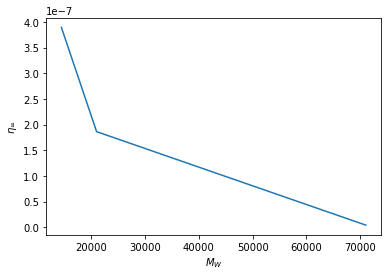

In [90]:
# For T = 450:
temperature = 450

mw  = [14450.75, 20990.38, 71024.72]
eta = [4.331164, 1.27944649e+01, 1.86213456e+03]

n_beads = np.array(mw)/14.0266
n_beads_for_code = n_beads/2
print(n_beads_for_code)
f_values = [0.5429639, 0.54515, 0.551157]
p_eff_values = [2863.11810, 2850.8134, 2816.93823]
eta_infinit = []
eta_inf_dic = {}
for itr in range(len(mw)):

    f_term = eta_f_Ai(n=n_beads[itr], f=f_values[itr])
    energy_term = eta_deltaE_Peff(p_eff=p_eff_values[itr], ref_T=temperature)
    # viscosity = eta_infinit*n_bead * energy_term * f_term

    eta_infinit.append(eta[itr]/(n_beads[itr]*f_term*energy_term))

print(eta_infinit)
eta_inf_dic [temperature] = eta_infinit
print('Mean value of eta_inf is: \n', str(np.mean(eta_infinit)))
plt.plot(mw, eta_infinit)
plt.xlabel("$M_W$")
plt.ylabel(r"${\eta}_{\infty}$")
plt.show()

[ 513.47432735  745.67001269 2520.42155619]
[3.9585879999865013e-07, 1.901936141889454e-07, 4.340633868018704e-09]
Mean value of eta_inf is: 
 1.9679768268520476e-07


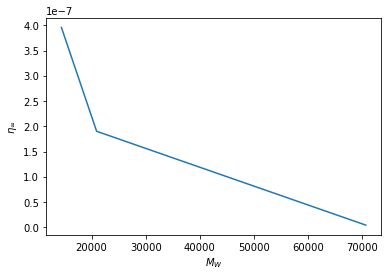

In [91]:
# For T = 460:
temperature = 460

mw  = [14404.598, 20918.43, 70705.89]
eta = [3.94072818e+00, 1.15599470e+01, 1.63031419e+03]

n_beads = np.array(mw)/14.0266
n_beads_for_code = n_beads/2
print(n_beads_for_code)

f_values = [0.5464287, 0.5486097, 0.5511574]
p_eff_values = [2906.83169, 2894.25984, 2859.991618]

eta_infinit = []
for itr in range(len(mw)):

    f_term = eta_f_Ai(n=n_beads[itr], f=f_values[itr])
    energy_term = eta_deltaE_Peff(p_eff=p_eff_values[itr], ref_T=temperature)
    # viscosity = eta_infinit*n_bead * energy_term * f_term

    eta_infinit.append(eta[itr]/(n_beads[itr]*f_term*energy_term))

print(eta_infinit)
eta_inf_dic [temperature] = eta_infinit
print('Mean value of eta_inf is: \n', str(np.mean(eta_infinit)))
plt.plot(mw, eta_infinit)
plt.xlabel("$M_W$")
plt.ylabel(r"${\eta}_{\infty}$")
plt.show()

[ 511.89204797  743.19883079 2509.4263756 ]
[4.023561937900493e-07, 1.9389822335962244e-07, 4.697670567848434e-09]
Mean value of eta_inf is: 
 2.003173625725067e-07


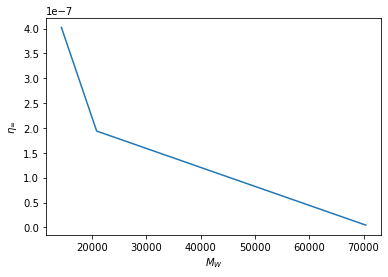

In [92]:
# For T = 470:
temperature = 470

mw  = [14360.21, 20849.10544, 70397.44]
eta = [3.59724777e+00, 1.04798416e+01, 1.43272387e+03]

n_beads = np.array(mw)/14.0266
n_beads_for_code = n_beads/2
print(n_beads_for_code)

f_values = [0.549958871, 0.5520889979, 0.5579329486]
p_eff_values = [2949.2175786, 2936.6246532, 2901.929568]

eta_infinit = []
for itr in range(len(mw)):

    f_term = eta_f_Ai(n=n_beads[itr], f=f_values[itr])
    energy_term = eta_deltaE_Peff(p_eff=p_eff_values[itr], ref_T=temperature)
    # viscosity = eta_infinit*n_bead * energy_term * f_term

    eta_infinit.append(eta[itr]/(n_beads[itr]*f_term*energy_term))

print(eta_infinit)
eta_inf_dic [temperature] = eta_infinit
print('Mean value of eta_inf is: \n', str(np.mean(eta_infinit)))
plt.plot(mw, eta_infinit)
plt.xlabel("$M_W$")
plt.ylabel(r"${\eta}_{\infty}$")
plt.show()

[ 510.36958351  740.82029858 2498.77874895]
[4.0883005266502745e-07, 1.9758585463814843e-07, 4.840401549316161e-09]
Mean value of eta_inf is: 
 2.0375210295083068e-07


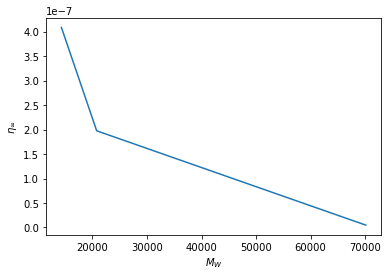

In [93]:
# For T = 480:
temperature = 480

mw  = [14317.50, 20782.38, 70098.74]
eta = [3.29413136, 9.53167563e+00, 1.26355264e+03]

n_beads = np.array(mw)/14.0266
n_beads_for_code = n_beads/2
print(n_beads_for_code)

f_values = [0.55350201500, 0.555577799, 0.56136345466]
p_eff_values = [2990.5586586, 2977.9789254, 2942.77108946]

eta_infinit = []
for itr in range(len(mw)):

    f_term = eta_f_Ai(n=n_beads[itr], f=f_values[itr])
    energy_term = eta_deltaE_Peff(p_eff=p_eff_values[itr], ref_T=temperature)
    # viscosity = eta_infinit*n_bead * energy_term * f_term

    eta_infinit.append(eta[itr]/(n_beads[itr]*f_term*energy_term))

print(eta_infinit)
eta_inf_dic [temperature] = eta_infinit
print('Mean value of eta_inf is: \n', str(np.mean(eta_infinit)))
plt.plot(mw, eta_infinit)
plt.xlabel("$M_W$")
plt.ylabel(r"${\eta}_{\infty}$")
plt.show()

[ 506.52367644  689.82041264 3987.98728313]
[6.274171180049805e-07, 2.6310723115778074e-07, 1.0600498285614917e-09]
Mean value of eta_inf is: 
 2.9719479966377427e-07


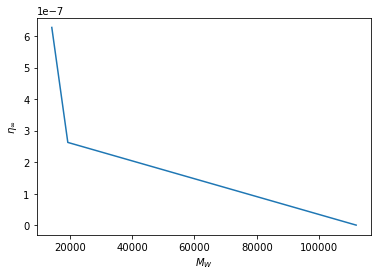

In [95]:
# For T = 490:
temperature = 490

mw  = [14209.61, 19351.67, 111875.804851]
eta = [4.47934755e+00, 7.98464483e+00, 2.11928981e+04]

n_beads = np.array(mw)/14.0266
n_beads_for_code = n_beads/2
print(n_beads_for_code)

f_values = [0.557040978, 0.5587375239, 0.56465039144]
p_eff_values = [3030.951278, 3020.41849223, 2983.563121969]

eta_infinit = []
for itr in range(len(mw)):

    f_term = eta_f_Ai(n=n_beads[itr], f=f_values[itr])
    energy_term = eta_deltaE_Peff(p_eff=p_eff_values[itr], ref_T=temperature)
    # viscosity = eta_infinit*n_bead * energy_term * f_term

    eta_infinit.append(eta[itr]/(n_beads[itr]*f_term*energy_term))

print(eta_infinit)
eta_inf_dic [temperature] = eta_infinit
print('Mean value of eta_inf is: \n', str(np.mean(eta_infinit)))
plt.plot(mw, eta_infinit)
plt.xlabel("$M_W$")
plt.ylabel(r"${\eta}_{\infty}$")
plt.show()

In [96]:
eta_inf_dic

{450: [3.8945799255283264e-07, 1.864791246988907e-07, 4.418678736177785e-09],
 460: [3.9585879999865013e-07, 1.901936141889454e-07, 4.340633868018704e-09],
 470: [4.023561937900493e-07, 1.9389822335962244e-07, 4.697670567848434e-09],
 480: [4.0883005266502745e-07, 1.9758585463814843e-07, 4.840401549316161e-09],
 490: [6.274171180049805e-07, 2.6310723115778074e-07, 1.0600498285614917e-09]}

In [97]:
print("Overall mean value for eta_inf is:")
print(np.mean(list(eta_inf_dic.values())))

Overall mean value for eta_inf is:
2.183027759736567e-07


# Without considering $N = N/2$ Rule.

Here, any calculations for the polymer with length of N (by 1shell.sh), is for N!

In [98]:
# For T = 450:
temperature = 450

mw  = [14450.75, 20990.38, 71024.72]
eta = [4.331164, 1.27944649e+01, 1.86213456e+03]

n_beads = np.array(mw)/14.0266
# n_beads_for_code = n_beads/2
print(n_beads)
f_values = [0.5429639, 0.54515, 0.551157]
p_eff_values = [2863.11810, 2850.8134, 2816.93823]
eta_infinit = []
eta_inf_dic = {}
for itr in range(len(mw)):

    f_term = eta_f_Ai(n=n_beads[itr], f=f_values[itr])
    energy_term = eta_deltaE_Peff(p_eff=p_eff_values[itr], ref_T=temperature)
    # viscosity = eta_infinit*n_bead * energy_term * f_term

    eta_infinit.append(eta[itr]/(n_beads[itr]*f_term*energy_term))

# print(eta_infinit)
# eta_inf_dic [temperature] = eta_infinit
# print('Mean value of eta_inf is: \n', str(np.mean(eta_infinit)))
# plt.plot(mw, eta_infinit)
# plt.xlabel("$M_W$")
# plt.ylabel(r"${\eta}_{\infty}$")
# plt.show()

[1030.23897452 1496.46956497 5063.57349607]
